In [1]:
import os.path
import numpy as np
import pandas as pd
from scipy.fft import fft

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
#%matplotlib notebook

from scipy.signal import welch

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#display(HTML(f"<style>.container {{ height: {400}px !important; }}</style>"))

In [2]:
file_folder = '/home/anna/annaCode/UiO/MEK4350/notebooks/Data_undervisning200923'
date_format = '%m/%d/%Y %H:%M:%S.%f'

#distances are taken from the wavemaker
distances_between_probes = np.array([6.98, 8.155, 12.325, 16.995])

df_list = []
for i in range(1,5):
    file_path =  os.path.join(file_folder, f"proberun{i}_tett.csv")
    df = pd.read_csv(file_path, names = ['date_string', 'probe_1_raw', 'probe_2_raw', 'probe_3_raw', 'probe_4_raw', 'sensors'])
    df['date_time'] = pd.to_datetime(df['date_string'], format=date_format)
    df['elapsed_secs'] =  (df['date_time'] - df.at[0, 'date_time']).dt.total_seconds()
    #calculate amplitudes in relation to water level
    df['probe_1'] = df['probe_1_raw'][0] - df['probe_1_raw']
    df['probe_2'] = df['probe_2_raw'][0] - df['probe_2_raw']
    df['probe_3'] = df['probe_3_raw'][0] - df['probe_3_raw']
    df['probe_4'] = df['probe_4_raw'][0] - df['probe_4_raw']
    for j in range(1,5):
        df[f'probe_{j}_hat'] =fft(df[f'probe_{j}'].to_numpy())
    df_list.append(df)
    
df = df_list[0]
df.head(2)


sample_no = df.shape[0]
sampling_rate = sample_no/df.elapsed_secs.iloc[-1]

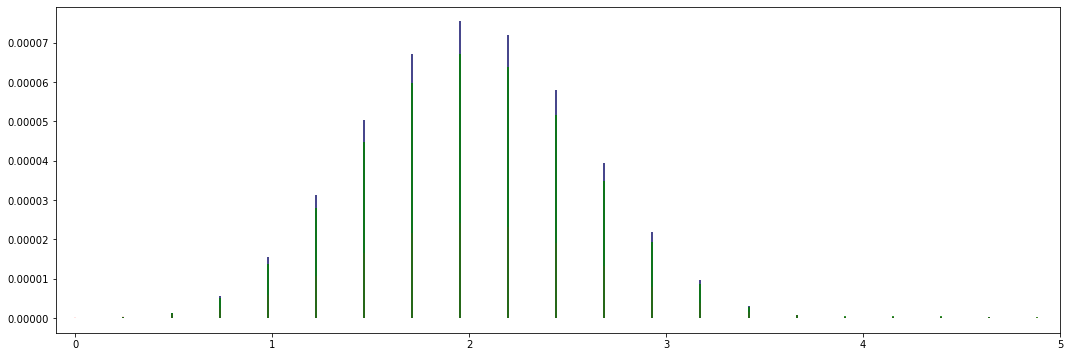

In [3]:
df = df_list[0]
frequencies = np.fft.fftfreq(sample_no, d=1/sampling_rate)
frequencies_welch1, psd_probe_1 = welch(np.real(df['probe_1']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)
frequencies_welch2, psd_probe_2 = welch(np.real(df['probe_2']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)
frequencies_welch4, psd_probe_4 = welch(np.real(df['probe_4']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)


fig, ax = plt.subplots(figsize=(18, 6))
ax.vlines(frequencies_welch1, 0, psd_probe_1,  linewidth=2, color = 'midnightblue', alpha = 0.8)
ax.vlines(frequencies_welch4, 0, psd_probe_2,  linewidth=2, color = 'green', alpha = 0.8)

_ = ax.vlines(frequencies_welch2, 0, psd_probe_4,  linewidth=2, color = 'red', alpha = 0.1)

_ = ax.set_xlim(-0.10, 5)

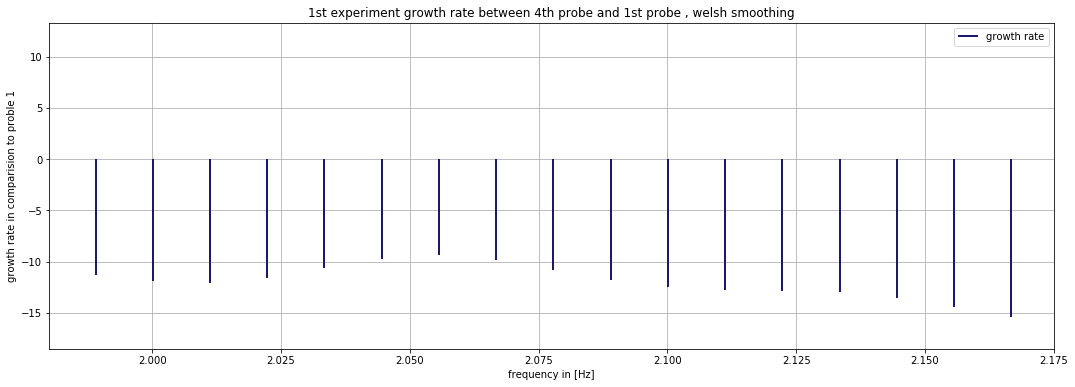

In [4]:
df = df_list[0]
distances_between_probes = np.array([6.98, 8.155, 12.325, 16.995])

distance_ratio = distances_between_probes[3] - distances_between_probes[0]
log_part = np.log(np.abs(psd_probe_4 / psd_probe_1))
growth_ratio = distance_ratio * log_part


fig, ax = plt.subplots(figsize=(18, 6)) 
ax.grid()
ax.set_xlim(1.98,2.175)
ax.vlines(frequencies, 0, growth_ratio,  linewidth=2, color = 'midnightblue', label = "growth rate")
#    ax.axvline(x=2, color='red', linestyle='--', linewidth=1, label=f'f = 2Hz')
ax.set_ylabel('growth rate in comparision to proble 1')
ax.set_xlabel('frequency in [Hz]')
ax.legend()
_= ax.set_title(f'1st experiment growth rate between 4th probe and 1st probe , welsh smoothing')

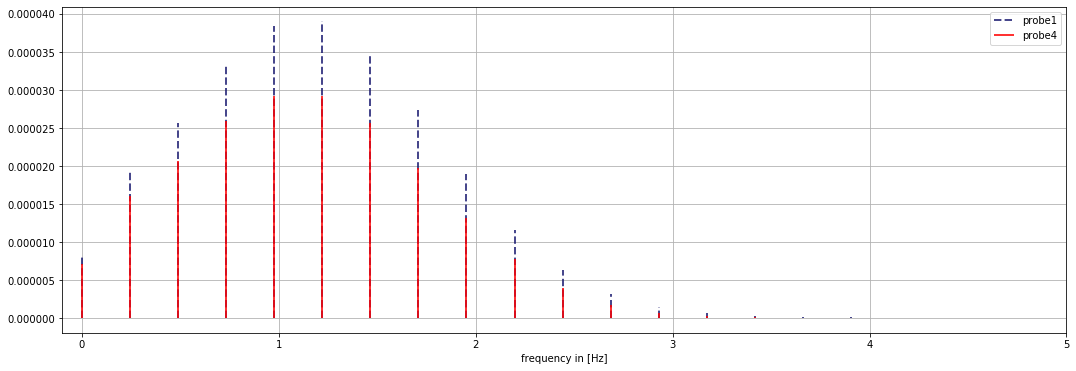

In [5]:
#experiment 4
df = df_list[3]
#frequencies = np.fft.fftfreq(sample_no, d=1/sampling_rate)
frequencies_welch1, psd_probe_1 = welch(np.real(df['probe_1']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)
frequencies_welch2, psd_probe_2 = welch(np.real(df['probe_2']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)
frequencies_welch4, psd_probe_4 = welch(np.real(df['probe_4']), fs=250, nperseg=256, window='hann', nfft=1024, return_onesided = True)


fig, ax = plt.subplots(figsize=(18, 6))
ax.vlines(frequencies_welch1, 0, psd_probe_1,  linewidth=2, linestyle = '--', color = 'midnightblue', alpha = 0.8, label = 'probe1')
ax.vlines(frequencies_welch4, 0, psd_probe_4,  linewidth=2, color = 'red', alpha = 0.8, label = 'probe4')

#_ = ax.vlines(frequencies_welch2, 0, psd,  linewidth=2, color = 'red', alpha = 0.1)
ax.grid()
ax.set_xlabel('frequency in [Hz]')

ax.legend()
_ = ax.set_xlim(-0.10, 5)

Text(0.5, 1.0, 'Growth rate between 4th probe and 1st probe experiment 4')

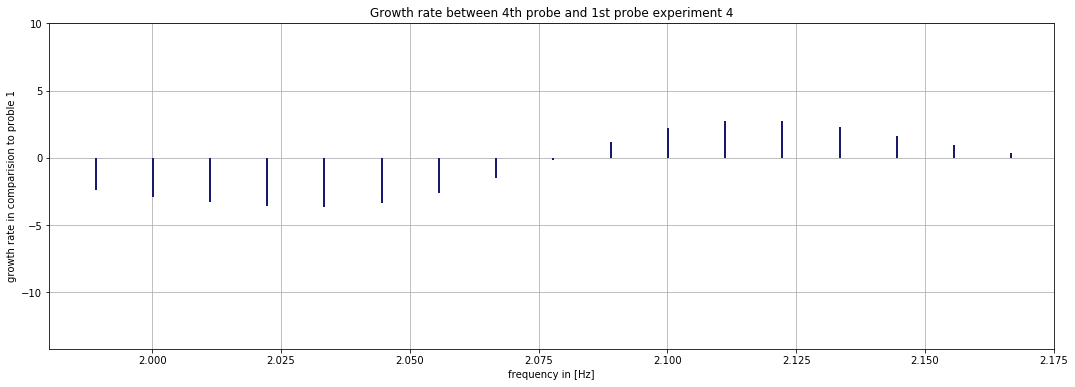

In [6]:
#experiment 4
df = df_list[3]
distances_between_probes = np.array([6.98, 8.155, 12.325, 16.995])

distance_ratio = distances_between_probes[3] - distances_between_probes[0]
log_part = np.log(np.abs(psd_probe_4 / psd_probe_1))
growth_ratio = distance_ratio * log_part


fig, ax = plt.subplots(figsize=(18, 6)) 
ax.grid()
ax.set_xlim(1.98,2.175)
ax.vlines(frequencies, 0, growth_ratio,  linewidth=2, color = 'midnightblue', label = 'growth_rate')
#    ax.axvline(x=2, color='red', linestyle='--', linewidth=1, label=f'f = 2Hz')
ax.set_ylabel('growth rate in comparision to proble 1')
ax.set_xlabel('frequency in [Hz]')
ax.set_title(f'Growth rate between 4th probe and 1st probe experiment 4')